## Готовим данные

In [89]:
import pandas as pd

In [90]:
df = pd.read_csv('./data/02_titanic_train.csv')

In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [93]:
# удалил таблицы 
df = df.drop(['Cabin', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1)

In [94]:
# удалил строки с пропуском
df = df[~df['Age'].isnull()]

In [95]:
df.shape

(714, 7)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [97]:
y = df['Survived']

In [98]:
df = df.drop(['Survived'], axis=1)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
PassengerId    714 non-null int64
Pclass         714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


## А где же машинное обучение?

# scikit-leant 

In [100]:
# scikit-learn
from sklearn.tree import DecisionTreeClassifier
# готовим почву 
dtc = DecisionTreeClassifier()

# обучение машины fit  df  данные , y - ответы 
dtc.fit(df, y)
# делаем предсказание
predict = dtc.predict(df)

In [101]:
predict

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [102]:
# Но как сравнить? Как понять хорошо мы отработали или не очень?

In [103]:

df_s = pd.DataFrame(list(
        zip(predict, y)
))
df_s.head()

,0,1
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0


In [104]:
# доля верных ответов
from sklearn.metrics import accuracy_score
accuracy_score(y, predict)

1.0

In [105]:
# на чём обучались на том и проверяете. Это плохо.
# Переобучились . когда id выступает в роли карты ответов. id -> ответ.


Бинарные клалификация : фрод - 1, котик - 1, спашив - 1
В круг берём  то что ищем, соответствено здесь ошибки первого рода - то что в круги в право false positivies.
И то что за кругом ошибка второго круга false negatives

![Image](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/440px-Precisionrecall.svg.png)

In [106]:
from sklearn.metrics import precision_score, recall_score

In [107]:
precision_score(y, predict)

1.0

In [108]:
recall_score(y, predict)

1.0

In [109]:
## Так ли хорошо работает модель?

In [110]:
from sklearn.cross_validation import train_test_split

![Image](http://scott.fortmann-roe.com/docs/docs/MeasuringError/holdout.png)

In [111]:
from sklearn.cross_validation import train_test_split

In [112]:
# разбиваем данные на части. Случайном образом разбиваете. Делает шавл.
# Y - целевая . таргет
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [113]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier() # у квалификатора есть своё случайное значение.
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)

In [114]:
accuracy_score(y_test, predict)

0.6186440677966102

# в метриках есть такая проблема.
acc 0.999. Метрика классификации. Балансировака классов.

In [115]:
from sklearn.metrics import accuracy_score, f1_score
# вывести все метрики
print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.5420560747663551
recall 0.5858585858585859
accuracy 0.6186440677966102
f1 0.5631067961165048


In [116]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))

precision 0.6842105263157895
recall 0.5252525252525253
accuracy 0.6991525423728814


In [117]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# вычелсить вероятность
predict = rfc.predict_proba(X_test)

In [118]:
# можно брать правый столбец. Вероятность на каждое значение
predict

array([[0.5, 0.5],
       [0. , 1. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [0.3, 0.7],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.9, 0.1],
       [0. , 1. ],
       [0.4, 0.6],
       [0.5, 0.5],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.3, 0.7],
       [0.9, 0.1],
       [0.5, 0.5],
       [0.3, 0.7],
       [0. , 1. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.5, 0.5],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.9, 0.1],
       [0.7, 0.3],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.7, 0.3],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [0.4,

In [119]:
predict[:, 1]
# можно менять треш холд, 

array([0.5, 1. , 0.4, 0.6, 0. , 0.7, 0.1, 0.3, 0.4, 0.1, 0.3, 0.4, 0.8,
       0.1, 1. , 0.6, 0.5, 0.6, 0.4, 0.7, 0.1, 0.5, 0.7, 1. , 0.2, 0.4,
       0.6, 0.5, 0.8, 0. , 0. , 0.6, 0.6, 0.1, 0.3, 0.1, 0.4, 0.3, 0. ,
       0. , 0.5, 0.1, 1. , 0.1, 0.8, 0.2, 0.6, 0.6, 0.2, 0.2, 0.8, 0. ,
       0.6, 0.5, 0. , 0.2, 0.4, 0.6, 0.1, 0.3, 0.3, 0.2, 0.5, 0.3, 0.1,
       0.6, 0.7, 0.5, 0. , 0.3, 0.1, 0.5, 0.4, 0.1, 0.1, 0.1, 0.1, 0.4,
       0. , 0.9, 0. , 0.8, 0.1, 0.7, 0. , 0.1, 0. , 0.3, 0. , 0.1, 0.1,
       0.9, 0.4, 0.2, 0.5, 0.4, 0.7, 0.8, 0.6, 0.3, 0.6, 0.5, 0. , 0.3,
       0.8, 0.3, 0.1, 0.8, 0.6, 0.2, 0.4, 0.1, 0.4, 0.3, 0.2, 0.2, 0.4,
       0.7, 0.4, 0. , 0.8, 0.1, 0.2, 0.7, 1. , 0. , 0.3, 0.4, 0.6, 0.2,
       0.3, 0.2, 0.5, 0.6, 0.1, 0.5, 0.1, 0.8, 0.1, 0.2, 0. , 0.1, 0.6,
       0.3, 0.3, 0.2, 0. , 0.4, 0.4, 0.5, 0.2, 0.1, 0.1, 0.3, 0.6, 0.4,
       0.1, 0.4, 0.9, 0.8, 0.7, 0.4, 0.1, 1. , 0.3, 0.6, 1. , 0.4, 0.9,
       0.3, 0.1, 0.6, 0.1, 0.4, 0.6, 0.3, 0. , 0.5, 0.3, 0.2, 0.

In [120]:
from sklearn.metrics import precision_recall_curve

In [121]:
precision, recall, thresholds = precision_recall_curve(y_test, predict[:1])

ValueError: Found input variables with inconsistent numbers of samples: [236, 1]

(-0.01, 1.01)

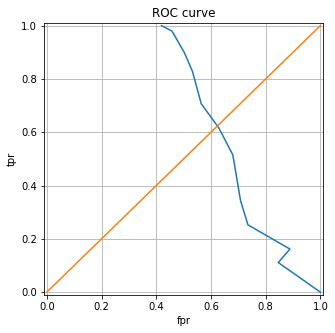

In [125]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
# fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, predict[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

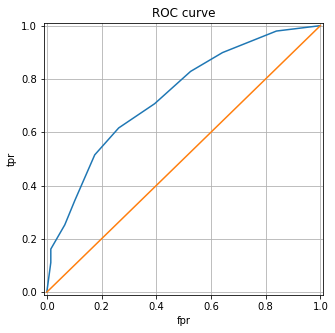

In [135]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
# fpr, tpr, thresholds = precision_recall_curve(y_test, predict[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr') # true passetive 
plt.xlabel('fpr') # false passetive
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [128]:
# площадь под кривой - оценка качества черного ящика.=> 0.5 - 1, классификатор
roc_auc_score(y_test, predict[:,1]) 

0.7358991373589914

![Image](http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/06/07_cross_validation_diagram.png)

In [136]:
# режит тест на несколько частей, а затем из последовательно передаёт.
# даёт не переубочиться по разрез данных
# что делать с результатом:
# десперсия - минимальная
# вероятность средняя
from sklearn.cross_validation import cross_val_score
rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    df,
    y,
    scoring='roc_auc',
    cv=10
)

ValueError: Found input variables with inconsistent numbers of samples: [891, 714]

## Вернемся к данным

In [170]:
df = pd.read_csv('./data/02_titanic_train.csv')
# данные надо удалить данные которые не играют никакой роли
# нельзя прицепливаться к данным котоые нельзя использовать
# данные которые не умеем работать
df = df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1)

In [171]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [173]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [174]:
# оун хок энкодинг. Заменяет данные на цифры. 
# Embarked не очень подходит как класс, потому делим на столбы
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [175]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [155]:
# осталось решить проблему с возростом.
# заменить на -1 Nan либо обучить 
# заполнить медианной, частый 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [181]:
# но это не точно так делать надо считать медиану по полу. TODO pls
df[df["Age"].isnull()]["Age"] = df["Age"].median()
#FIXME df["Age"].fillna(28)
"""
df[
    (df["Age"].isnull() & (df["Sex_male"] == 1))
].median()
"""

'\ndf[\n    (df["Age"].isnull() & (df["Sex_male"] == 1))\n].median()\n'

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null float64
Pclass        891 non-null float64
Age           891 non-null float64
SibSp         891 non-null float64
Parch         891 non-null float64
Fare          891 non-null float64
Sex_female    891 non-null float64
Sex_male      891 non-null float64
Embarked_C    891 non-null float64
Embarked_Q    891 non-null float64
Embarked_S    891 non-null float64
dtypes: float64(11)
memory usage: 76.6 KB


Переобучить модель. Не удалили Survived. Drop Survived

In [180]:
dtc = DecisionTreeClassifier()
cross_val_score(
    dtc,
    df, # df.drop(['Survived'], axis=1)
    df['Survived'],
    scoring='roc_auc',
    cv=10
)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
from sklearn.metrics import roc_auc_score
Посчиать.


ДЗ : DataRing.ru -> ... данные по ссылки http://dataring.ru/competitions/otp-bank/
Конкурсы. Просрочка кредита. 
Работать одновремено test и основными данными. Отстранить target
